## NVisual 用来对网络可视化,它是network visuallize的缩写

In [21]:
import numpy as np
import pandas as pd
import networkx as nx

from FNetwork import *

# filename = 'Embryo.mapper.csv'
filename = 'data_phate_tree.csv'
# filename = 'data_mESC.csv' # original data more than 20000 dimension
# filename = 'data_mESC_50d.csv'
# filename = 'data_phate_EB_50d.csv'
# filename = 'data_phate_DLA_tree.csv'
# filename = 'data_1.csv'

nodes, edges, time_weights = filter_network(datafile=filename)
adm = fnetwork_to_network(nodes, edges, time_weights, time=0.6)

In [22]:
adm.shape

(1440, 1440)

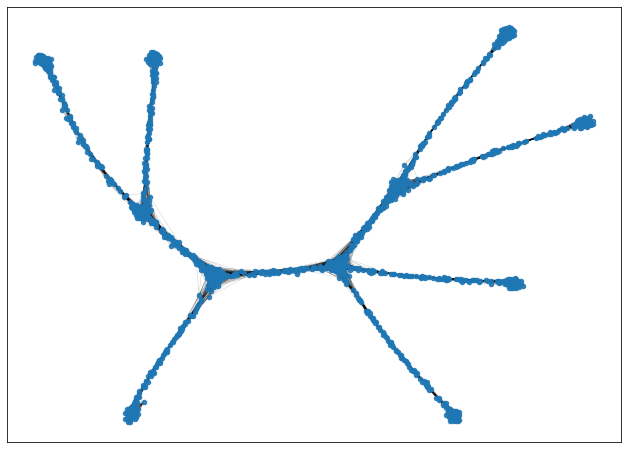

In [23]:
n=adm.shape[0]

# construct network, and save it to .gexf file
# construct nx class from adjacent matrix
G = nx.from_numpy_array(adm)
# calculate layout
pos = nx.nx_agraph.graphviz_layout(G, 'sfdp', '-Goverlap=false -GK=0.1')
# color value
# colors = [v for v in range(n)]
node_color = 'tab:blue'
edge_width = 0.1
# fig, ax = plt.subplots()
plt.figure(figsize=(11, 8))
nx.draw_networkx(G, 
                 pos=pos, # position of nodes
                 node_color=node_color, # colors of node
                 cmap=plt.cm.rainbow, # color map
                 with_labels=False, # if draw label for each node
                 node_size=20, # size of node
                 linewidths=None, # Line width of symbol border
                 width=edge_width, # Line width of edges
                 edge_color='black', # color of edge. 'grey'
                 alpha=0.9, # The node and edge transparency
                )
# width

In [24]:
# type(adm)
# print(adm.shape)
# print(type(pos))

# # for key, value in pos.items():
# #     print(key,value)

(1440, 1440)
<class 'dict'>


In [25]:
# data_pos = []
# for key in sorted(pos.keys()):
#     data_pos.append(pos[key])
# #     print(key)

In [26]:
# pd_data_pos = pd.DataFrame(data_pos)
# # datapd.to_csv('Embryo.mapper.csv', header=False, index=False)
# pd_data_pos.to_csv('test_data_pos.csv', header=False, index=False)

In [27]:
# pd_adm = pd.DataFrame(adm)
# pd_adm.to_csv('test_data_adm.csv', header=False, index=False)

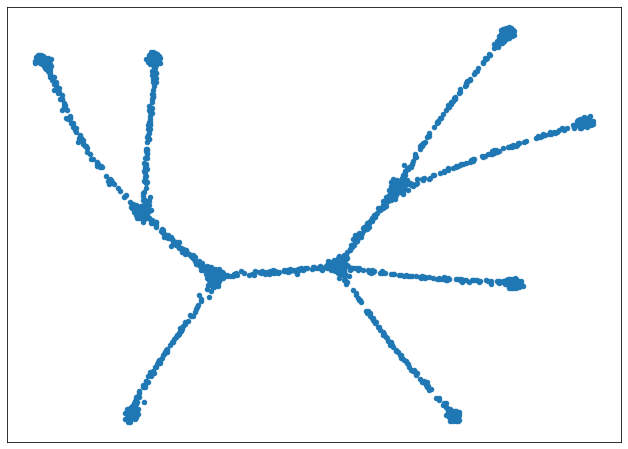

In [8]:
plt.figure(figsize=(11, 8))
nx.draw_networkx(G, 
                 pos=pos,
#                  node_color='black',
                 with_labels=False,
                 node_size=20,
                 width=0)

In [9]:
if filename == 'data_phate_tree.csv':
    label_file = 'data_phate_tree_labels.csv'
    timepoint = np.array(pd.read_csv(label_file, header=None))
elif filename =='data_mESC.csv' or filename =='data_mESC_50d.csv':
    label_file = 'data_mESC_labels.csv'
    timepoint = np.array(pd.read_csv(label_file, header=None))
elif filename == 'data_phate_EB_50d.csv':
    label_file = 'data_phate_EB_labels.csv'
    timepoint = np.array(pd.read_csv(label_file, header=None))
elif filename == 'data_phate_DLA_tree.csv':
    label_file = 'data_phate_DLA_tree_labels.csv'
    timepoint = np.array(pd.read_csv(label_file, header=None))
elif filename == 'Embryo.mapper.csv':
    # 导入时间点
    datefile = 'Embryo_cell_labels.csv'

    # 读取数据为pd.dataframe格式，并显示列名称
    # df = pd.read_csv(datefile)
    # col_names = list(df)
    # print(col_names)


    cellinfo = np.array(pd.read_csv(datefile))
    timepoint = cellinfo[:,1]
    print(timepoint)
    type(timepoint)
    # cellinfo = np.array(df)
    # cellinfo.shape

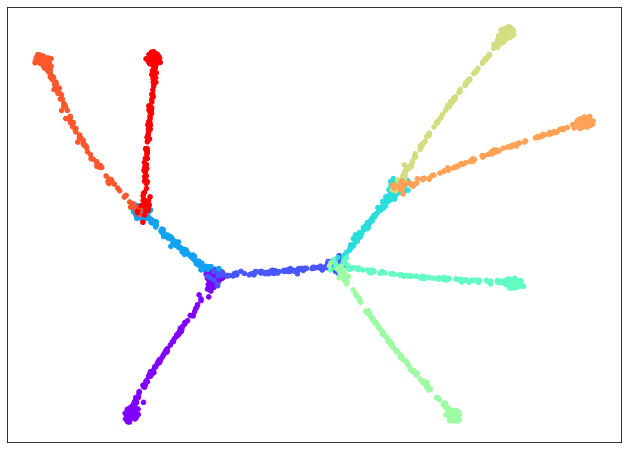

In [10]:
plt.figure(figsize=(11, 8))
nx.draw_networkx(G, 
                 pos=pos,
                 node_color=timepoint,
                 cmap=plt.cm.rainbow,
                 alpha=1,
                 with_labels=False,
                 node_size=20,
                 width=0,
                 edge_color='grey',
                )

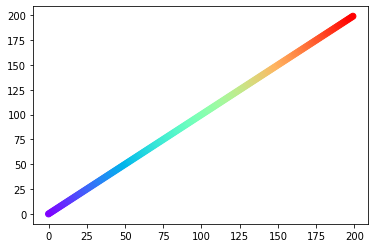

In [11]:
x = [i for i in range(200)]
plt.scatter(x, x, c=x, cmap=plt.cm.rainbow)

In [12]:
from sklearn.manifold import TSNE

# filename = 'Embryo.mapper.csv'
X = np.array(pd.read_csv(filename, header=None))

# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)

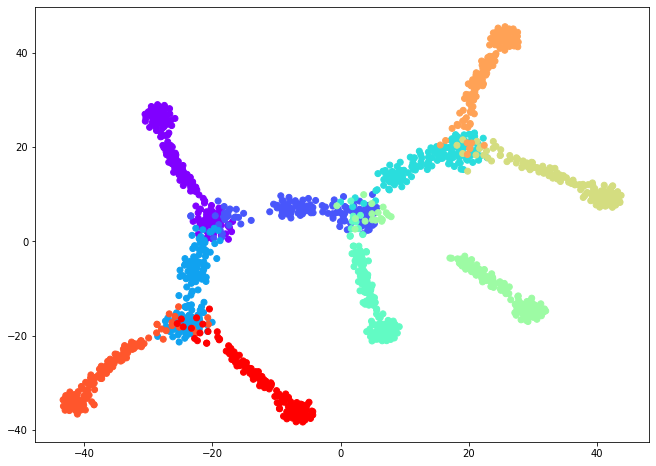

In [13]:
# X_embedded.shape
plt.figure(figsize=(11, 8))
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=timepoint, cmap=plt.cm.rainbow)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
digits = datasets.load_digits(n_class=6)
x=digits.data
y=digits.target

In [15]:
X_embedded_digits = TSNE(n_components=2).fit_transform(x)

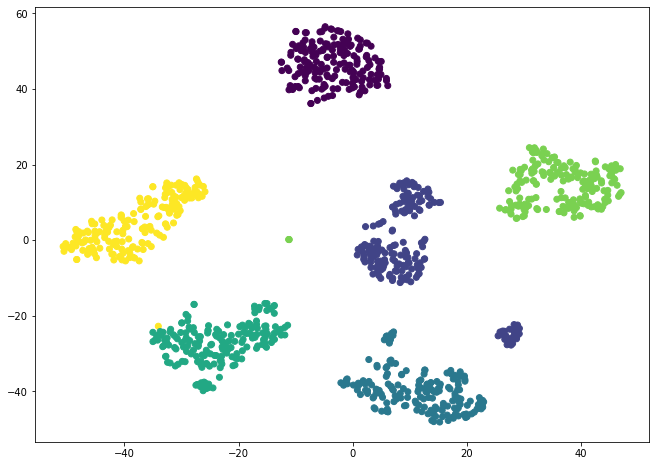

In [16]:
plt.figure(figsize=(11, 8))
plt.scatter(X_embedded_digits[:,0],X_embedded_digits[:,1], c=y)

In [17]:
# datapd.to_csv('Embryo.mapper.csv', header=False, index=False)
data_digits = pd.DataFrame(x)
data_digits.to_csv('data_digits.csv', header=False, index=False)

In [18]:
data_digits_labels = pd.DataFrame(y)
data_digits_labels.to_csv('data_digits_labels.csv', header=False, index=False)

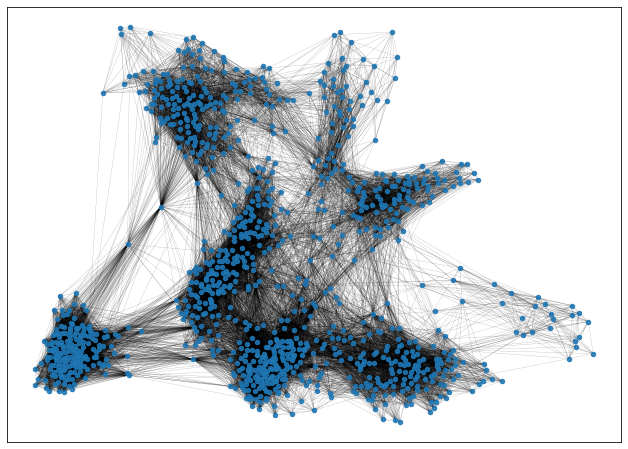

In [19]:
filename = 'data_digits.csv'

nodes, edges, time_weights = filter_network(datafile=filename)
adm = fnetwork_to_network(nodes, edges, time_weights, time=0.9)
G = nx.from_numpy_array(adm)
# calculate layout
pos = nx.nx_agraph.graphviz_layout(G, 'sfdp', '-Goverlap=false -GK=0.1')
# color value
# colors = [v for v in range(n)]
node_color = 'tab:blue'
edge_width = 0.1
# fig, ax = plt.subplots()
plt.figure(figsize=(11, 8))
nx.draw_networkx(G, 
                 pos=pos, # position of nodes
                 node_color=node_color, # colors of node
                 cmap=plt.cm.rainbow, # color map
                 with_labels=False, # if draw label for each node
                 node_size=20, # size of node
                 linewidths=None, # Line width of symbol border
                 width=edge_width, # Line width of edges
                 edge_color='black', # color of edge. 'grey'
                 alpha=0.9, # The node and edge transparency
                )

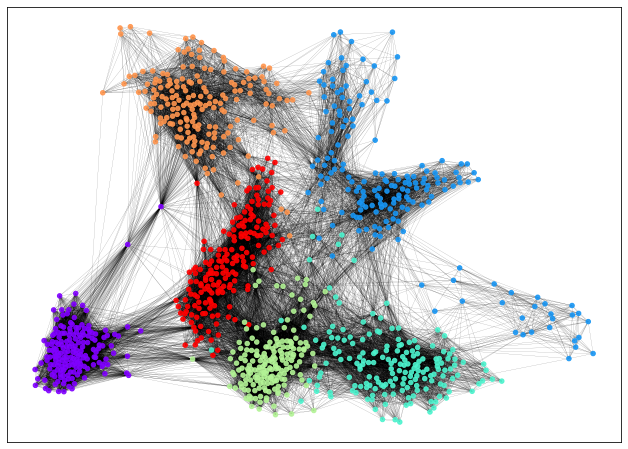

In [20]:
labels = np.array(pd.read_csv('data_digits_labels.csv', header=None))
node_color = labels#'tab:blue'
edge_width = 0.1
# fig, ax = plt.subplots()
plt.figure(figsize=(11, 8))
nx.draw_networkx(G, 
                 pos=pos, # position of nodes
                 node_color=node_color, # colors of node
                 cmap=plt.cm.rainbow, # color map
                 with_labels=False, # if draw label for each node
                 node_size=20, # size of node
                 linewidths=None, # Line width of symbol border
                 width=edge_width, # Line width of edges
                 edge_color='black', # color of edge. 'grey'
                 alpha=0.9, # The node and edge transparency
                )